In [33]:
import pandas as pd

data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [35]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
# Looking at churn data
churned_count = sum(data['churn'])
not_churn_count = len(data['churn'])-churned_count
total_count = len(data['churn'])

print(f"Original Clients: {total_count}")
print(f"Lost Clients: {churned_count}")
print(f"Loyal Clients: {not_churn_count}")

Original Clients: 10000
Lost Clients: 2037
Loyal Clients: 7963


In [37]:
# Churn rates based numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['churn'], errors='ignore')
table = pd.pivot_table(data, index='churn', values = numeric_data.columns)
print(table)

       active_member        age       balance  credit_card  credit_score  \
churn                                                                      
0           0.554565  37.408389  72745.296779     0.707146    651.853196   
1           0.360825  44.837997  91108.539337     0.699067    645.351497   

        customer_id  estimated_salary  products_number    tenure  
churn                                                             
0      1.569117e+07      99738.391772         1.544267  5.033279  
1      1.569005e+07     101465.677531         1.475209  4.932744  


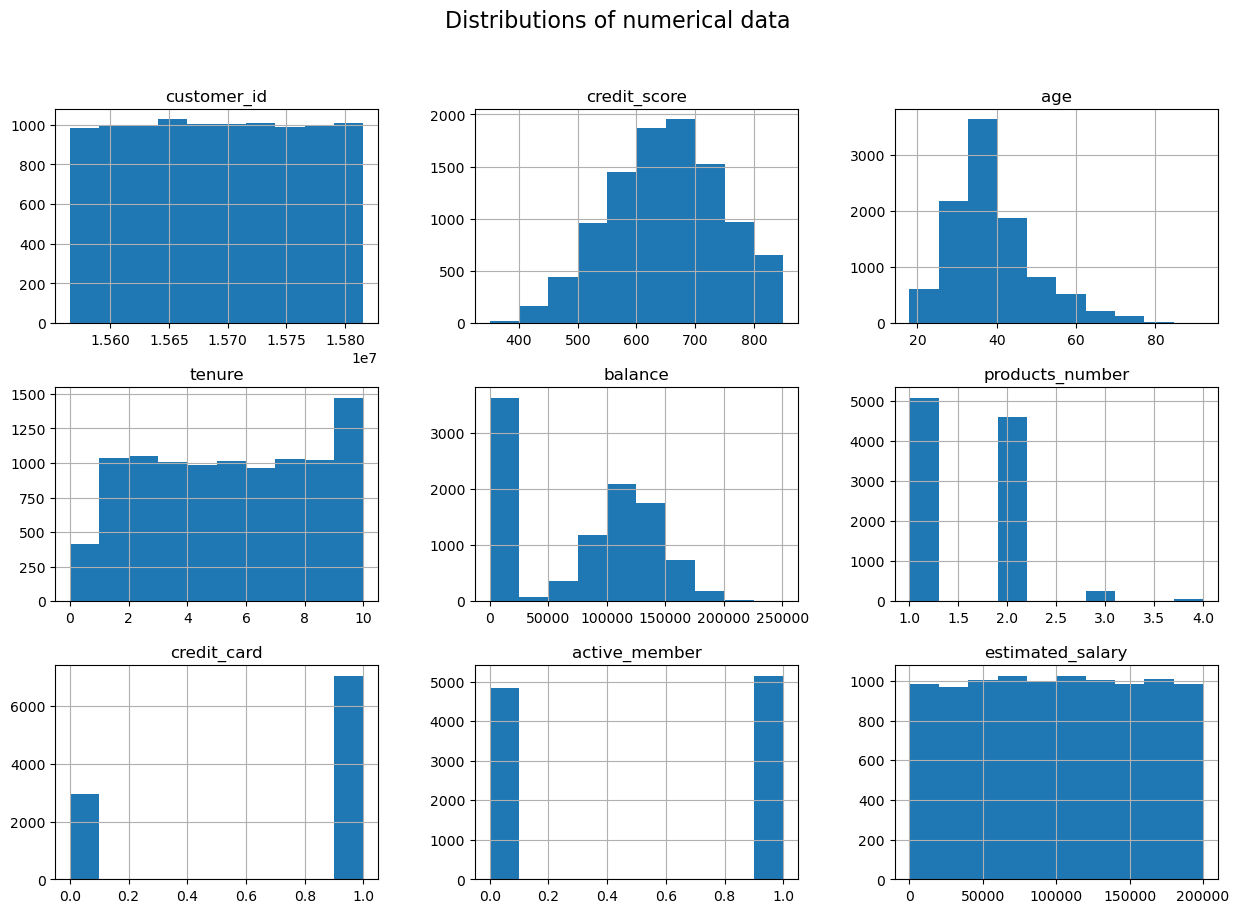

In [38]:
import matplotlib.pyplot as plt
numeric_data.hist(bins = 10, figsize=(15,10))
plt.suptitle("Distributions of numerical data", fontsize=16)
plt.show()

In [47]:
# Detecting outliers in the dataset
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

for feature in numeric_data:
    outliers_iqr = detect_outliers_iqr(data, feature)
    print(f"{feature} - IQR Outliers: {len(outliers_iqr)}")

#for now disregard, because only testing on decision trees/ random forest

customer_id - IQR Outliers: 0
credit_score - IQR Outliers: 15
age - IQR Outliers: 359
tenure - IQR Outliers: 0
balance - IQR Outliers: 0
products_number - IQR Outliers: 60
credit_card - IQR Outliers: 0
active_member - IQR Outliers: 0
estimated_salary - IQR Outliers: 0


In [39]:
# Checking for missing data
missing_data = data.isna().sum()
print(missing_data[missing_data>0])

Series([], dtype: int64)


In [40]:
data['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [41]:
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [42]:
# Mapping gender and country
gender_mapping = {'Male': 1, 'Female': 0}
country_mapping = {'France': 0, 'Germany': 1, 'Spain': 2}

data['country'] = [country_mapping[c] for c in data['country']]
data['gender'] = [gender_mapping[g] for g in data['gender']]

In [43]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


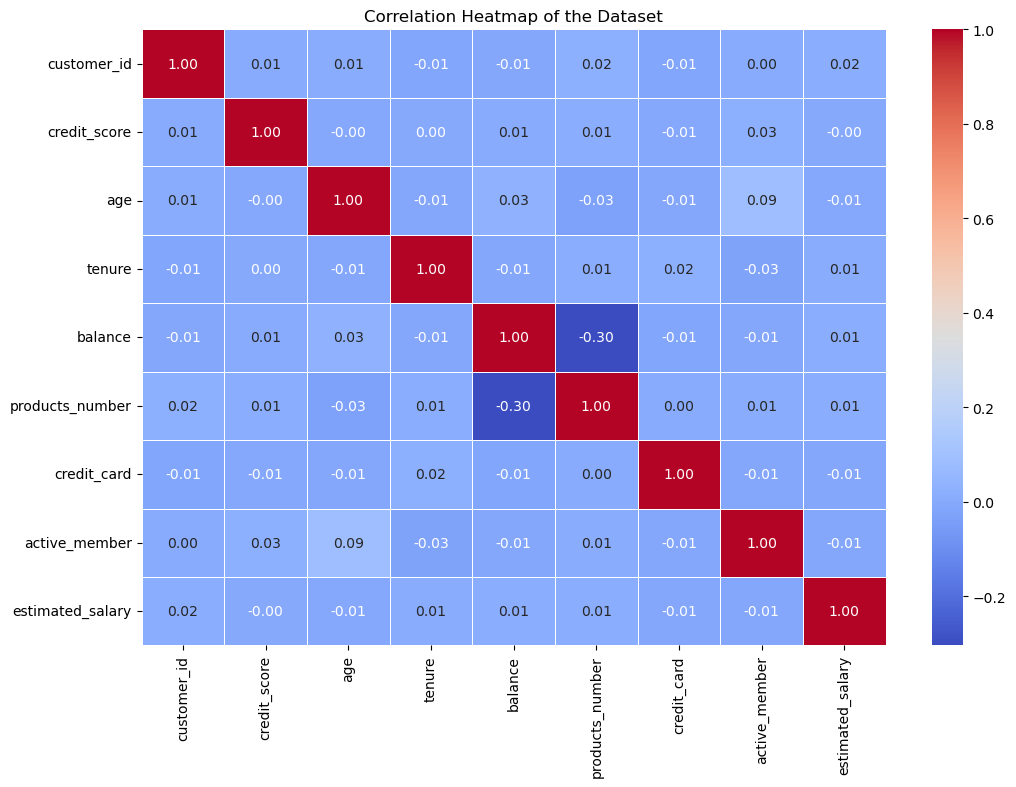

In [46]:
import seaborn as sns
from matplotlib import pyplot as plt

categorical_data = data.select_dtypes(include = ['object'])

plt.figure(figsize= (12,8))
heatmap = sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()